<img src=https://audiovisuales.icesi.edu.co/assets/custom/images/ICESI_logo_prin_descriptor_RGB_POSITIVO_0924.jpg width=200>

*Milton Orlando Sarria Paja, PhD.*

----

# Práctica: KNN (K-nearest Neighbors)

### Importar librerías necesarias para la aplicación del algoritmo KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

# Matplotlib configuration
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9) # styles of Matplotlib
plt.style.use('ggplot')

#These lines of code are importing necessary modules from the scikit-learn library for implementing the K-Nearest Neighbors (KNN) algorithm for classification.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Acerca del Dataset
Se han registrado 257 opiniones de usuarios sobre una app (Reviews). Utilizaremos 2 columnas de datos como fuente de alimento del algoritmo. Recuerden que sólo tomamos 2 features para poder graficar en 2 dimensiones, PERO para un problema “real” conviene tomar más características. Esto es únicamente con fines de enseñanza. Las columnas que utilizaremos serán: wordcount con la cantidad de palabras utilizadas y sentimentValue con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo. Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5. Podemos pensar que si el usuario puntúa con más estrellas, tendrá un sentimiento positivo, pero no necesariamente siempre es así.



# Objetivo de la práctica
En este ejercicio crearemos un modelo con Python para procesar y clasificar puntos de un conjunto de entrada con el algoritmo k-Nearest Neighbor. Cómo su nombre en inglés lo dice, se evaluán los “k vecinos más cercanos” para poder clasificar nuevos puntos.

In [42]:
# Import dataframe
dataframe = pd.read_csv('data/dataset_app.csv')
#dataframe.to_csv('data/dataset_sin_indices.csv', index=False)

# Vista preliminar de los datos

In [11]:
#Returns a tuple representing the dimensions of the DataFrame. The first element of the tuple is the number of rows and the second element is the number of columns.
dataframe.shape

(257, 7)

In [12]:
#Shows the first five rows of the dataframe.
dataframe.head()

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784


In [13]:
#Shows the last five rows of the dataframe.
dataframe.tail()

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
252,Muy buena aplicacion,Muy buena genial,3,positive,positive,5,2.814818
253,Buena,Genial,1,positive,positive,5,2.924393
254,Wuau,Genial,1,positive,positive,5,2.924393
255,Muy buena,Genial,1,positive,positive,5,2.924393
256,Sg S5,Excelente y exacta,3,negative,positive,5,3.264579


# Estadística básicas de tendencia central para variables numéricas

Proporciona estadísticas descriptivas de un dataframe.
Incluye el conteo, la media, la desviación estándar, el valor mínimo, el valor máximo y los valores de los cuartiles para cada columna del dataframe.
Este método es útil para obtener una visión rápida de los datos e identificar posibles problemas, como valores faltantes o atípicos (outliers).

In [14]:
dataframe.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


Son 257 registros. Las estrellas van del 1 al 5. La cantidad de palabras van de 1 hasta 103. y las valoraciones de sentimiento están entre -2.27 y 3.26 con una media de 0,38 y a partir del desvío estándar podemos ver que la mayoría están entre `0,38-0,89` y `0,38+0,89.`

# Limpieza de los datos

In [31]:
#Hacer una copia del dataframe original es una buena práctica antes de modificarlo
df_clean = dataframe.copy()

In [32]:
#Calcula el número total de registros duplicados en el DataFrame. y eliminarlos
print(df_clean.duplicated().sum())

df_clean = df_clean.drop_duplicates()
df_clean = df_clean.reset_index(drop=True)

#Check duplicate column removal
df_clean.duplicated().sum()

1


0

In [33]:
#Calcula el número de valores faltantes (NaN) en cada columna del dataframe.
nan = df_clean.isna().sum()
print(nan)

Review Title       0
Review Text        0
wordcount          0
titleSentiment    26
textSentiment      0
Star Rating        0
sentimentValue     0
dtype: int64


In [34]:
# Creando un nuevo dataframe con los valores faltantes en la columna llamada sentiment.
df_NaNtitleSentiment = df_clean[df_clean.isna().any(axis=1)]
#Devuelve una tupla que representa las dimensiones del DataFrame. 
#El primer elemento de la tupla es el número de filas y el segundo elemento es el número de columnas.
df_NaNtitleSentiment.shape

(26, 7)

In [35]:
# S
df_NaNtitleSentiment.head(26)

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
30,"Buena app, pero","Buena app, pero…",76,NaN,negative,2,-0.295194
41,Util,"Funciona bien,…",9,NaN,positive,3,-0.012039
61,Me gusta,Es una buena herramienta para…,10,NaN,positive,3,-0.110967
67,👍,😂👍,1,NaN,positive,3,-0.139861
68,Buenísima,"A.,,",1,NaN,positive,3,-0.139861
83,Una pena,La nueva versión … de la vaca.,7,NaN,negative,1,-0.396850
90,Muy buena,Buenas tardes necesito saber como hago para que…,20,NaN,positive,3,0.001546
102,Buena aplicación,Sitio donde,4,NaN,positive,3,0.125126


In [37]:
#Replacing NaN values with coherent observations in titleSentiment column.
df_clean.loc[2, "titleSentiment"] = "positive"
df_clean.loc[3, "titleSentiment"] = "negative"
df_clean.loc[30, "titleSentiment"] = "negative"
df_clean.loc[41, "titleSentiment"] = "positive"
df_clean.loc[61, "titleSentiment"] = "positive"
df_clean.loc[67, "titleSentiment"] = "positive"
df_clean.loc[68, "titleSentiment"] = "positive"
df_clean.loc[83, "titleSentiment"] = "negative"
df_clean.loc[90, "titleSentiment"] = "positive"
df_clean.loc[102, "titleSentiment"] = "positive"
df_clean.loc[105, "titleSentiment"] = "positive"
df_clean.loc[123, "titleSentiment"] = "positive"
df_clean.loc[124, "titleSentiment"] = "positive"
df_clean.loc[135, "titleSentiment"] = "positive"
df_clean.loc[140, "titleSentiment"] = "positive"
df_clean.loc[176, "titleSentiment"] = "positive"
df_clean.loc[191, "titleSentiment"] = "positive"
df_clean.loc[201, "titleSentiment"] = "positive"
df_clean.loc[203, "titleSentiment"] = "positive"
df_clean.loc[205, "titleSentiment"] = "positive"
df_clean.loc[206, "titleSentiment"] = "positive"
df_clean.loc[227, "titleSentiment"] = "positive"
df_clean.loc[233, "titleSentiment"] = "positive"
df_clean.loc[235, "titleSentiment"] = "positive"
df_clean.loc[245, "titleSentiment"] = "positive"
df_clean.loc[249, "titleSentiment"] = "positive"

In [38]:
#Check NaN replacements
nan = df_clean.isna().sum()
print(nan)

Review Title      0
Review Text       0
wordcount         0
titleSentiment    0
textSentiment     0
Star Rating       0
sentimentValue    0
dtype: int64


# Ejercicios
1. Genera un histograma para analizar la distribución de las variables wordcount, Star Rating y sentimentValue. Consigna tus observaciones, ¿Se encuentran los datos balanceados?

2. ¿En qué valor(es) se encuentran la mayoría de estrellas y cantidad de palabras? Puedes generar una gráfica de barras para poder responder a esta pregunta.

# Preparar las entradas

Crearemos nuestro `X` e `y` de entrada y los `sets` de entrenamiento y test.

In [39]:
X = df_clean[['wordcount','sentimentValue']].values #Predictor variables
y = df_clean['Star Rating'].values #Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Definiremos el valor de K en 7 para crear nuestro clasificador, más adelante revisaremos el por qué de esta decisión.

In [24]:
n_neighbors = 7

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.86


####  Precisión del modelo
Confirmemos la precisión viendo la Confusión Matrix y el Reporte sobre el conjunto de test, que nos detalla los aciertos y fallos:

In [25]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 9  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  1 17  0  1]
 [ 0  0  2  8  0]
 [ 0  0  4  0 20]]
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1
           3       0.71      0.89      0.79        19
           4       1.00      0.80      0.89        10
           5       0.95      0.83      0.89        24

    accuracy                           0.86        64
   macro avg       0.83      0.89      0.84        64
weighted avg       0.89      0.86      0.87        64



Cómo se ve la precisión o accurracy de nuestro modelo es del 86%, bastante buena. 

**NOTA**: recuerden que este es sólo un ejercicio para aprender y tenemos MUY pocos registros totales y en nuestro conjunto de test. Por ejemplo de 2 estrellas sólo tiene 1 valoración y esto es evidentemente insuficiente.

# Y ahora, ¡La gráfica que queríamos ver!

C:\Users\16079220\AppData\Local\anaconda3\envs\bancow2\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


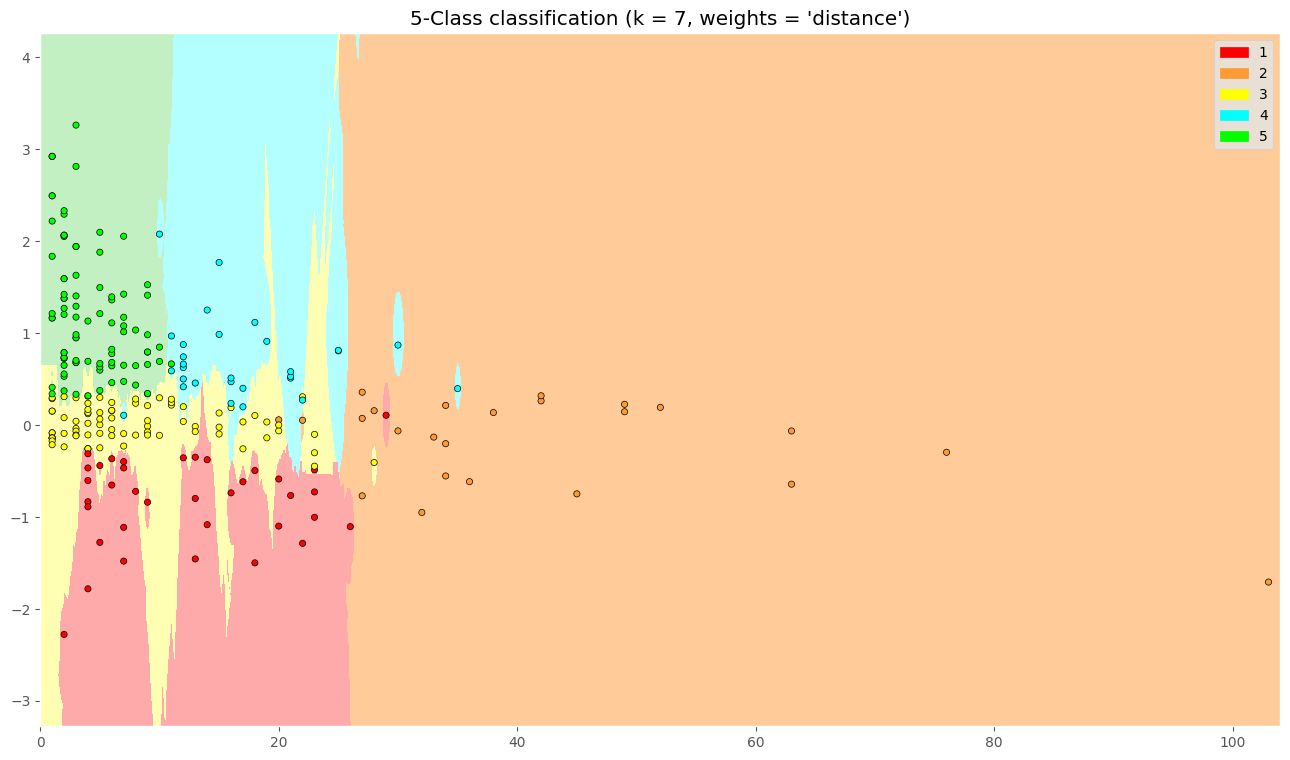

In [26]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

# we create an instance of Neighbours Classifier and fit the data.
w='distance'
clf = KNeighborsClassifier(n_neighbors, weights=w, metric='euclidean')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])


plt.title("5-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, w))

plt.show()

Un review de 20 palabras y Sentimiento 1, nos daría una valoración de 4 (zona celeste).

Con estas zonas podemos intuir ciertas características de los usuarios que usan y valoran la app:

Los usuarios que ponen 1 estrella tienen sentimiento negativo y hasta 25 palabras.

Los usuarios que ponen 2 estrellas dan muchas explicaciones (hasta 100 palabras) y su sentimiento puede variar entre negativo y algo positivo.

Los usuarios que ponen 3 estrellas son bastante neutrales en sentimientos, puesto que están en torno al cero y hasta unas 25 palabras.

Los usuarios que dan 5 estrellas son bastante positivos (de 0,5 en adelante, aproximadamente) y ponen pocas palabras (hasta 10).

# Elegir el mejor valor de k
Antes vimos que asignamos el valor n_neighbors=7 como valor de “k” y obtuvimos buenos resultados. ¿Pero de donde salió ese valor?. Pues realmente se tuvo que ejecutar el siguiente código, donde vemos distintos valores k y la precisión obtenida.

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


([<matplotlib.axis.XTick at 0x2c292cbea70>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

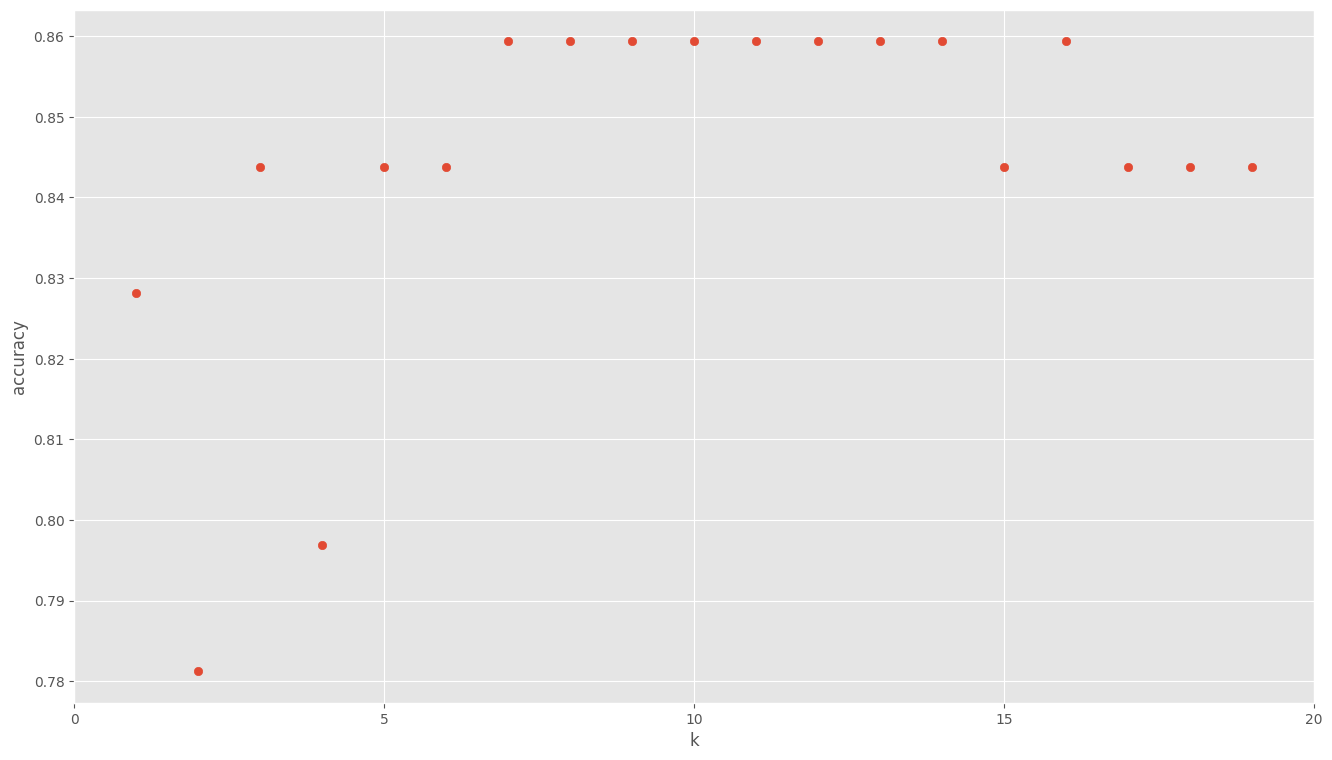

In [41]:

k_range = range(1, 20)
scores = []
for k in k_range:
    print(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

En la gráfica vemos que con valores k=7 a k=14 es donde mayor precisión se logra.

# Clasificar y/o predecir nuevas muestras


In [28]:
#
print(clf.predict([[5, 1.0]]))

[5]


Este resultado nos indica que para 5 palabras y sentimiento 1, nos valorarán la app con 5 estrellas.
Pero también podríamos obtener las probabilidades que de nos den 1, 2,3,4 o 5 estrellas con predict_proba():

In [29]:
print(clf.predict_proba([[20, 0.0]]))

[[0.00381998 0.02520212 0.97097789 0.         0.        ]]


Aquí vemos que para las coordenadas 20, 0.0 hay 97% probabilidades que nos den 3 estrellas. Puedes comprobar en el gráfico anterior, que encajan en las zonas que delimitamos anteriormente.